Legal Data Analysis - Présentation Finale
*par Juliette DREYFUS et Dorine PESSEMESSE (Ms/LLM DMI-HEC)*

**Thème :** Le blanchiment de capitaux

**Objectifs recherchés :**

> Nous souhaitons scraper le site internet Judilibre.
> Cibler les décisions rendues par la Cour de cassation.
> Création d'un dataframe.
> Utilisation du dataframe afin d'analyser l'évolution dans le temps des décisions rendues en matière de blanchiment de capitaux, zoom sur les formations de la Cour de cassation compétentes, la publicité accordée aux décisions ou encore l'issue données aux affaires en la matière.  

**Outils :**

*   Google Colab ;
*   ChatGPT (uniquement pour la création des graphiques).




I. Création de notre base de travail : Dataframe

In [ ]:
# Importing libraries
import requests
import spacy
import regex as re
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd

# Defining the initial search URL:
url = "https://www.courdecassation.fr/recherche-judilibre?search_api_fulltext=blanchiment&op=Rechercher&date_du=&date_au=&judilibre_juridiction=cc"

# Initializing the main list to store data:
main_list = []

# Extracting data from the webpage:
webpage = requests.get(url)
soup = BeautifulSoup(webpage.content)

# Main loop to iterate through result pages:
for i in range (223):
  if i !=0:
    new_url = "https://www.courdecassation.fr/recherche-judilibre?search_api_fulltext=blanchiment&op=Rechercher&date_du=&date_au=&judilibre_juridiction=cc"+str("&page=")+str(i)
    webpage = requests.get(new_url)
    soup = BeautifulSoup(webpage.content)

# Extracting HTML elements containing decision information:
    décisions = soup.find_all("div", class_="decision-item")

# Extracting specific data from each decision and adding it to the main list:
    for a in décisions :
      sublist = [ ]
      date = a.find("h3").text.split("-\n") [0]
      match = re.search(r'\d+\s\w+\s\d+', date)
      if match:
          date = match.group()
      formation = a.find("p", class_="decision-item-header--secondary").text
      Chambre = formation.split("-")
      formation = Chambre[0].strip()
      solution = a.find("p", class_="decision-item-header--secondary solution").text
      publication = a.find("p", class_="decision-item-header--large").text
      publication = publication.replace("\n", "")

      sublist = {'Date': date, 'Formation': formation, 'Issue de la décision': solution, 'Publication': publication }
      main_list.append(sublist)

# Creating the DataFrame from the main list:
df = pd.DataFrame(main_list)
print(df)




                 Date                                     Formation  \
0        12 mars 2024                            Chambre criminelle   
1        12 mars 2024                            Chambre criminelle   
2        12 mars 2024                            Chambre criminelle   
3         6 mars 2024                            Chambre criminelle   
4         6 mars 2024                            Chambre criminelle   
...               ...                                           ...   
1961     9 avril 1992                            Chambre criminelle   
1962     18 juin 1991                            Chambre criminelle   
1963  23 juillet 1987                            Chambre criminelle   
1964   6 janvier 1970  Chambre commerciale financière et économique   
1965   5 janvier 1967                            Chambre criminelle   

     Issue de la décision                                        Publication  
0                   Autre                                           

II. Analyse de l'évolution dans le temps du nombre de décisions rendues en matière de blanchiment de capitaux




In [ ]:
!pip install dateparser
import pandas as pd
import dateparser

# Convert the 'Date' column to a string
df['Date'] = df['Date'].astype(str)

# Apply dateparser.parse() to each element of the 'Date' column
df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x))




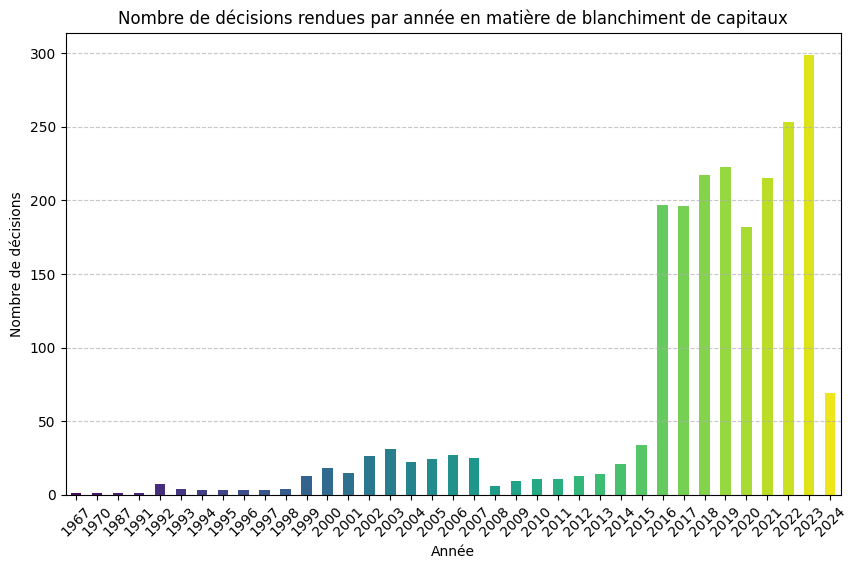

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Count the number of decisions per year
decisions_par_annee = df['Date'].dt.year.value_counts().sort_index()

# Define a color palette for the bars
palette = sns.color_palette('viridis', len(decisions_par_annee))

# Plot the graph
plt.figure(figsize=(10, 6))
decisions_par_annee.plot(kind='bar', color=palette)
plt.xlabel('Année')
plt.ylabel('Nombre de décisions')
plt.title('Nombre de décisions rendues par année en matière de blanchiment de capitaux')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

III. Analyse des formations de la Cour de cassation compétentes en matière de blanchiment de capitaux

---



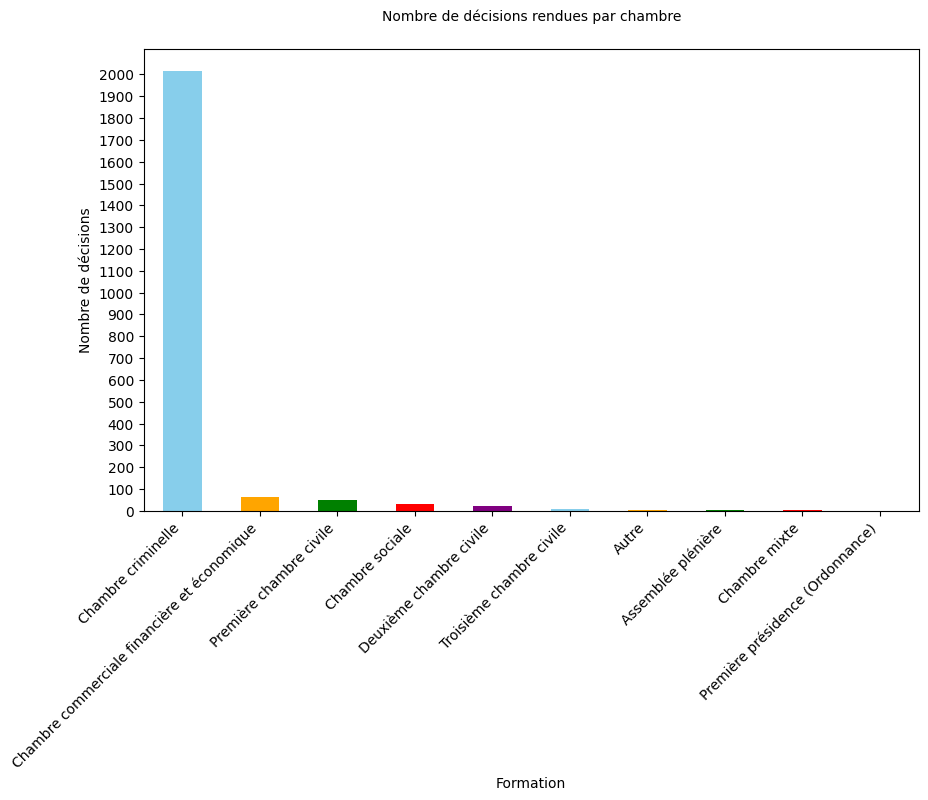

In [ ]:

# DataFrame
df = pd.DataFrame(main_list)

# Count the number of decisions per chamber

decisions_par_chambre = df['Formation'].value_counts()

# Create a list of colors for each chamber

couleurs = ['skyblue', 'orange', 'green', 'red', 'purple']

# Create the bar plot

plt.figure(figsize=(10, 6))
barplot=decisions_par_chambre.plot(kind='bar', color=couleurs,width=0.5)

# Adding labels and titles

plt.xlabel('Formation', fontsize=10)
plt.ylabel('Nombre de décisions',fontsize=10)
plt.title('Nombre de décisions rendues par chambre',fontsize=10, pad=20)

# Adjusting ticks on the y-axis

plt.yticks(range(0, max(decisions_par_chambre)+1, 100))

# Adjusting the rotation of chamber labels

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', va='top')

# Display the plot

plt.show()

III (bis). Analyse des formations de la Cour de cassation compétentes en matière de blanchiment de capitaux (deuxième proposition de présentation sous forme de graphique circulaire)


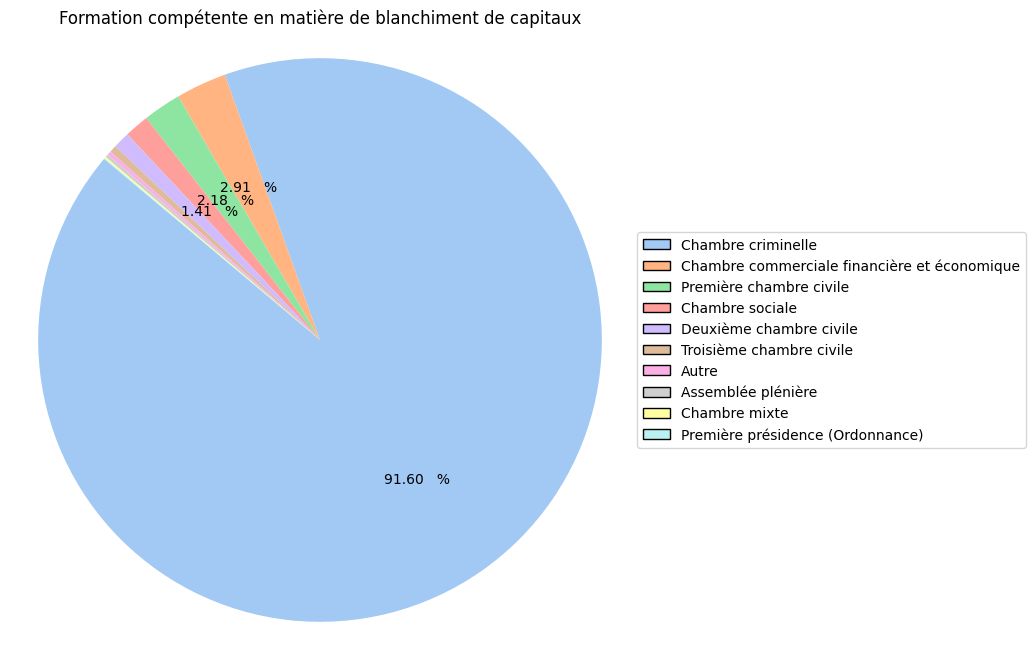

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# DataFrame

df = pd.DataFrame(main_list)

# Count the number of decisions per category

decisions_par_solution = df['Formation'].value_counts()

# Create a subtle color palette for each category

palette = sns.color_palette("pastel", len(decisions_par_solution))

# Create the pie chart

plt.figure(figsize=(8, 8))
plt.pie(decisions_par_solution, labels=None, colors=palette, startangle=140, autopct=lambda p: '{:.2f}   %'.format(p) if p > 1 else '')

# Create a custom legend

legend_elements = [Patch(facecolor=palette[i], edgecolor='black', label=label) for i, label in enumerate(decisions_par_solution.index)]
plt.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5))

# Adding titles

plt.title('Formation compétente en matière de blanchiment de capitaux')

# Display the plot

plt.axis('equal')  # Pour s'assurer que le graphique est un cercle et non une ellipse
plt.show()

IV. Analyse de l'issue donnée par la Cour de cassation aux affaires en matière de blanchiment de capitaux.

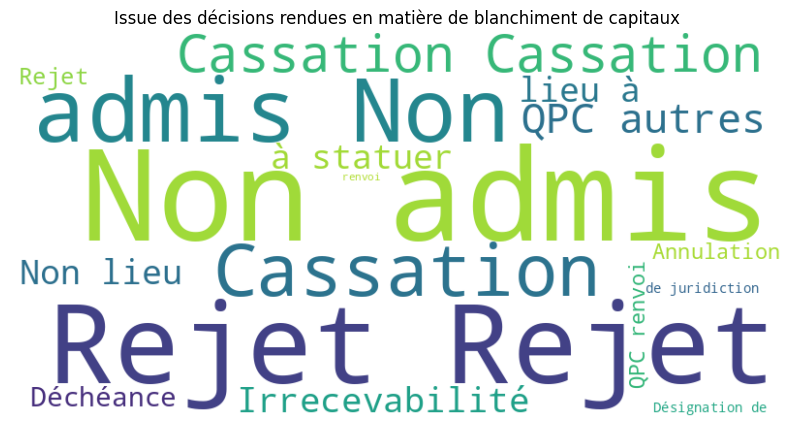

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.DataFrame(main_list)

# Remplace "Autre" mention with "Non-admis"

df['Issue de la décision'] = df['Issue de la décision'].replace('Autre', 'Non-admis')

df['Issue de la décision'] = df['Issue de la décision'].str.replace('désignation de', 'désignation de juridiction')

# Concatenate all rendered solutions into a single string

texte = ' '.join(df['Issue de la décision'])

# Create a word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Display the word cloud

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Issue des décisions rendues en matière de blanchiment de capitaux')
plt.show()

V.Analyse de la proportion de décisions rendues par la Cour de cassation et publiées en matière de blanchiment de capitaux


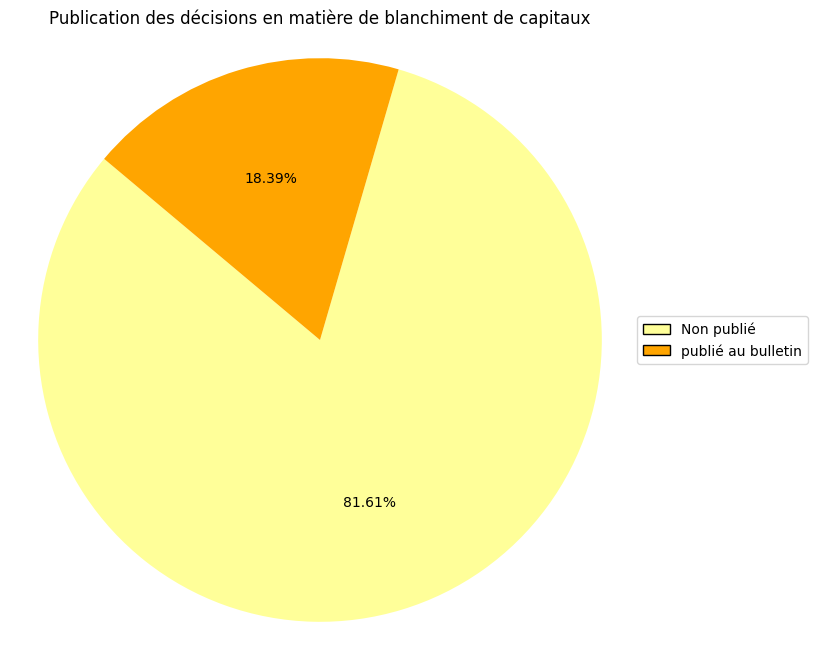

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# DataFrame
df = pd.DataFrame(main_list)

# Search for partial matches and replace with "publié au bulletin"

df['Publication'] = df['Publication'].str.replace('.*publié au bulletin.*', 'publié au bulletin', regex=True, case=False)

# Normalize data in the 'Publication' column

df['Publication'] = df['Publication'].str.strip().str.lower()

# Count the number of decisions per publication status

decisions_par_solution = df['Publication'].value_counts()

# Create a list of colors for each publication status

couleurs = ['#FFFF99', 'orange', 'green', 'red', 'yellow', 'purple']

# Create the pie chart

plt.figure(figsize=(8, 8))
plt.pie(decisions_par_solution, labels=None, colors=couleurs, startangle=140, autopct=lambda p: '{:.2f}%'.format(p) if p > 1 else '')

# Create a custom legend

legend_elements = [Patch(facecolor=couleurs[i], edgecolor='black', label=label) for i, label in enumerate(decisions_par_solution.index)]
legend_elements[0] = Patch(facecolor='#FFFF99', edgecolor='black', label='Non publié')
plt.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5))

# Adding titles
plt.title('Publication des décisions en matière de blanchiment de capitaux')

# Display the plot
plt.axis('equal')  # To ensure the plot is a circle not an ellipse
plt.show()